In [71]:
import tqdm
import torch
import pretrainedmodels
import matplotlib.pyplot as plt
from src.data import CelebaData
from src.net import VggNetwork
from src.explainer import ClassifierExplainer
from src.explainer.misc_functions import to_image
from src.utils import load_checkpoint

### Create/load pretrain model

In [75]:
model = VggNetwork(out=2)
load_checkpoint(model, "0-net.pth")
model.features

Checkpoint loaded: {'epoch': 0} 


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace)
  (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (16): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17)

Get summary about model

In [76]:
explainer = ClassifierExplainer(model)
explainer.print_summary()

vgg.features.0.weight: 1728
classifier.0.weight: 50176
vgg.features.3.weight: 73728
vgg.features.6.weight: 294912
vgg.features.8.weight: 589824
vgg.features.11.weight: 1179648
vgg.features.13.weight: 2359296
vgg.features.16.weight: 2359296
vgg.features.18.weight: 2359296
vgg.classifier.6.weight: 4096000
vgg.classifier.3.weight: 16777216
vgg.classifier.0.weight: 102760448

Total weights count = 132901568


In [70]:
val_data = CelebaData("data/val.csv")
image, label = val_data[662]
torch.softmax(model(image.unsqueeze(0)), 1)

tensor([[0.0017, 0.9983]], grad_fn=<SoftmaxBackward>)

In [49]:
label

tensor([1])

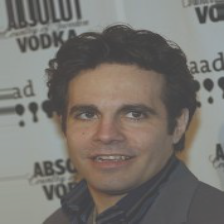

In [50]:
to_image(image)

In [51]:
image.requires_grad = True

## Heatmap visualisation 

In [52]:
heatmap, him = explainer.heatmap_visualisation(image, target_class=1)

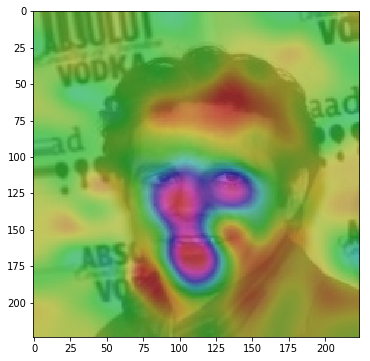

In [53]:
plt.figure(figsize=(6, 6))
plt.imshow(him);

## Smoothed Gradient visualisation

In [60]:
gradient = explainer.smooth_gradient_visualisation(image, sigma=1.7, iterations=10)

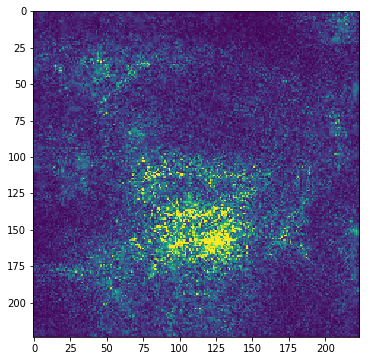

In [61]:
plt.figure(figsize=(6, 6))
plt.imshow(gradient[0]);

## Filter patterns visualisation from last convolutional layer

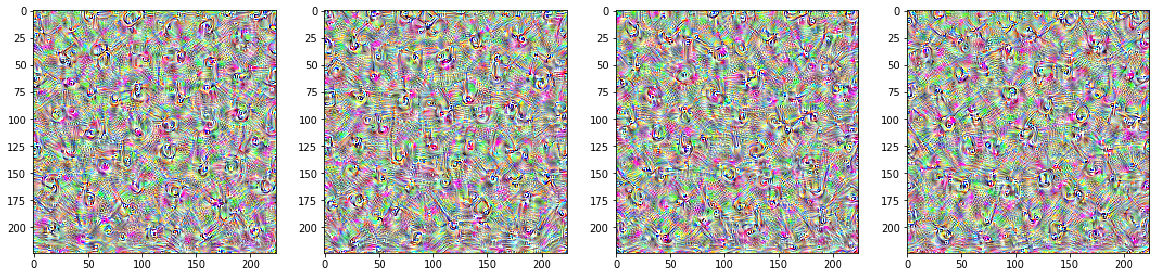

In [78]:
rows, cols = 1, 4
for i in tqdm.tqdm_notebook(range(rows)):
    plt.figure(figsize=(20, 20))
    for c in tqdm.tqdm_notebook(range(1, cols + 1)):
        plt.subplot(1, cols, c)
        filter_patterns = explainer.filter_pattern_visualisation(target_layer=18, target_filter=i*16*c-1)
        plt.imshow(filter_patterns)
    plt.show()

## Filter actiovation visualisation from last convolutional layer

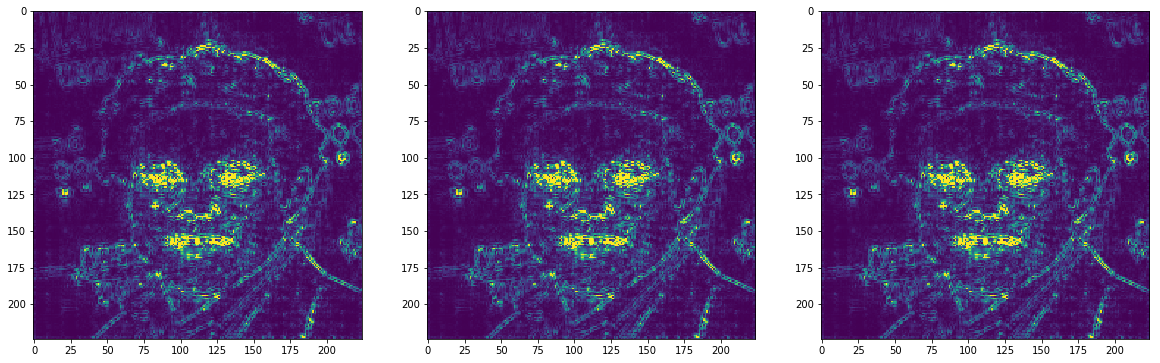

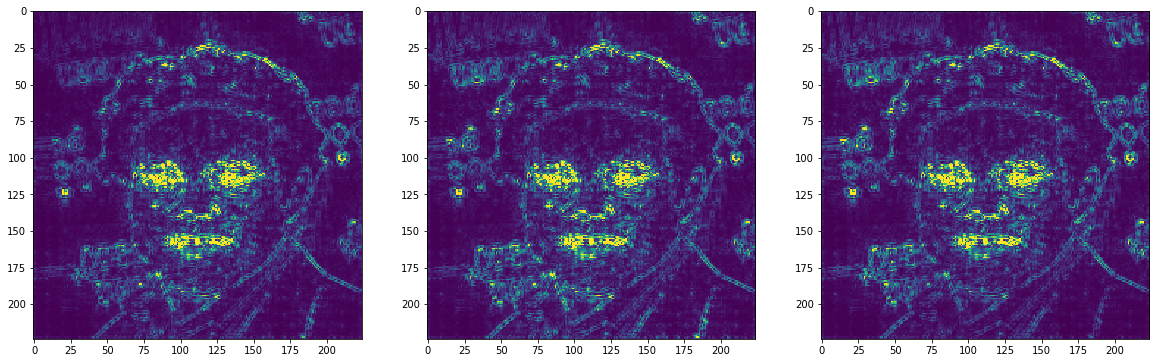

In [63]:
rows, cols = 2, 3
for i in tqdm.tqdm_notebook(range(rows)):
    plt.figure(figsize=(20, 20))
    for c in tqdm.tqdm_notebook(range(1, cols + 1)):
        plt.subplot(1, cols, c)
        filter_patterns = explainer.filter_activation_visualisation(image, target_layer=18, target_filter=i*c-1)
        plt.imshow(filter_patterns[0])
    plt.show()

## Filter actiovation visualisation from first layer

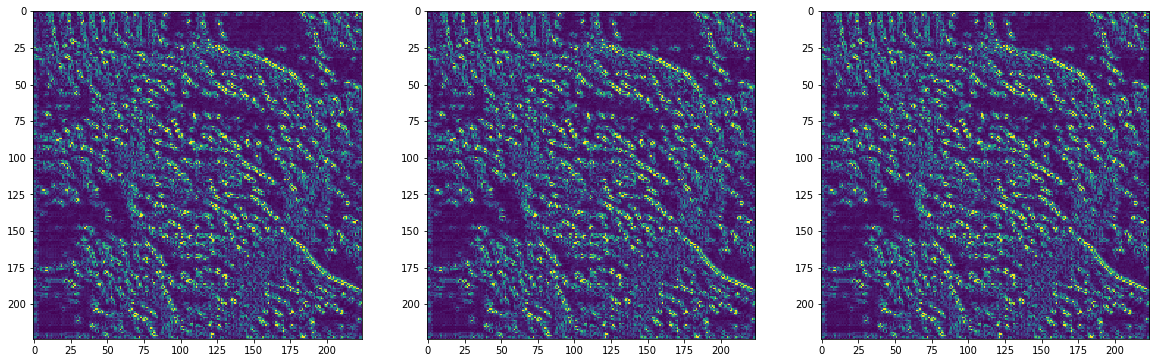

In [64]:
rows, cols = 1, 3
for i in tqdm.tqdm_notebook(range(rows)):
    plt.figure(figsize=(20, 20))
    for c in tqdm.tqdm_notebook(range(1, cols + 1)):
        plt.subplot(1, cols, c)
        filter_patterns = explainer.filter_activation_visualisation(image, target_layer=3, target_filter=i*c-1)
        plt.imshow(filter_patterns[0])
    plt.show()

# General eplanations

In [15]:
our_vgg = True

In [16]:
if our_vgg:
    model = VggNetwork(out=2)
    load_checkpoint(model, "0-net.pth")
else:
    model_name = 'resnet18'
    model = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
model

<bound method modify_resnets.<locals>.features of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

Get summary about model

In [17]:
explainer = ClassifierExplainer(model)
explainer.print_summary()

bn1.weight: 64
layer1.0.bn1.weight: 64
layer1.0.bn2.weight: 64
layer1.1.bn2.weight: 64
layer1.1.bn1.weight: 64
layer2.0.downsample.1.weight: 128
layer2.0.bn2.weight: 128
layer2.0.bn1.weight: 128
layer2.1.bn1.weight: 128
layer2.1.bn2.weight: 128
layer3.0.bn2.weight: 256
layer3.1.bn1.weight: 256
layer3.1.bn2.weight: 256
layer3.0.bn1.weight: 256
layer3.0.downsample.1.weight: 256
layer4.0.downsample.1.weight: 512
layer4.1.bn1.weight: 512
layer4.1.bn2.weight: 512
layer4.0.bn1.weight: 512
layer4.0.bn2.weight: 512
layer2.0.downsample.0.weight: 8192
conv1.weight: 9408
layer3.0.downsample.0.weight: 32768
layer1.1.conv2.weight: 36864
layer1.1.conv1.weight: 36864
layer1.0.conv2.weight: 36864
layer1.0.conv1.weight: 36864
layer2.0.conv1.weight: 73728
layer4.0.downsample.0.weight: 131072
layer2.1.conv1.weight: 147456
layer2.0.conv2.weight: 147456
layer2.1.conv2.weight: 147456
layer3.0.conv1.weight: 294912
last_linear.weight: 512000
layer3.1.conv2.weight: 589824
layer3.1.conv1.weight: 589824
layer3.0

## Weight distributions

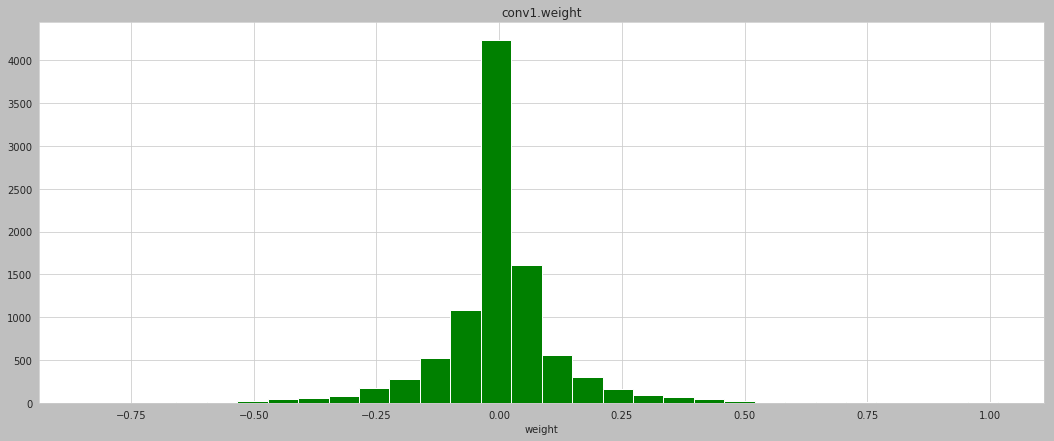

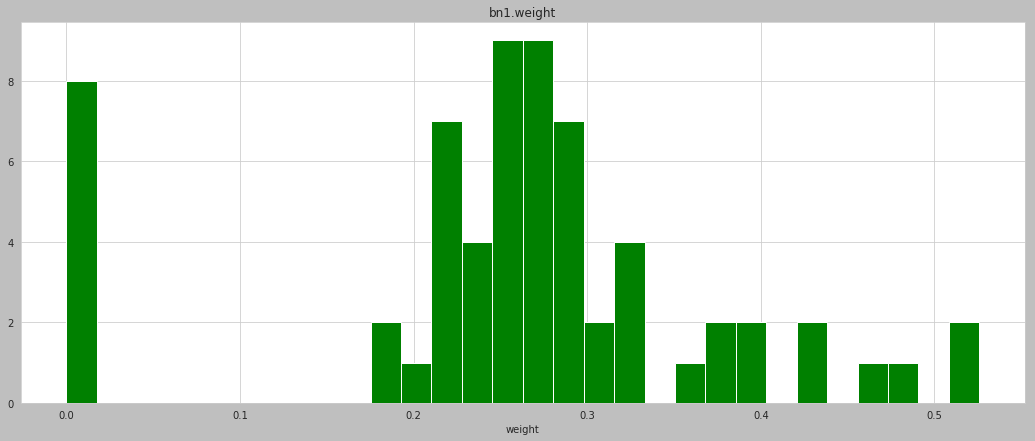

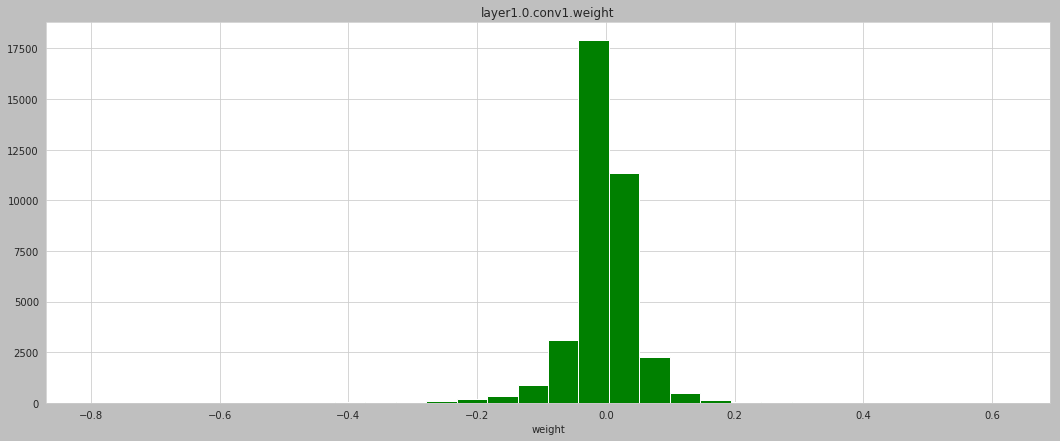

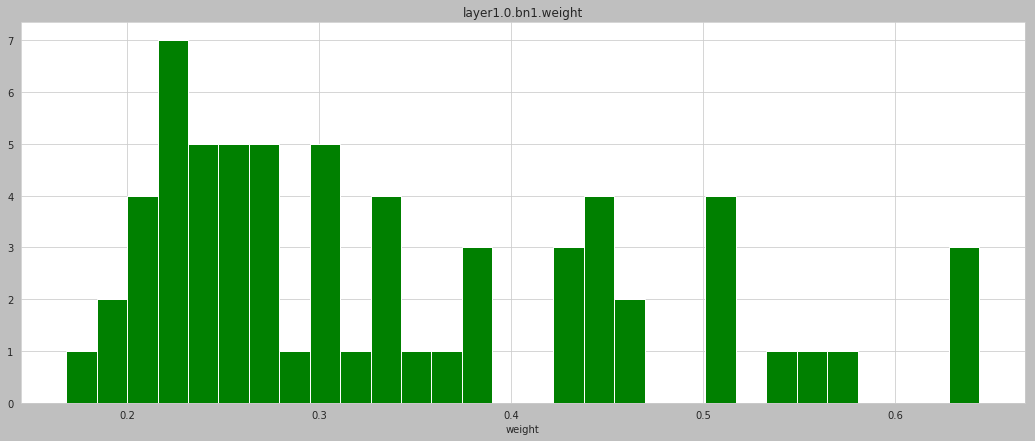

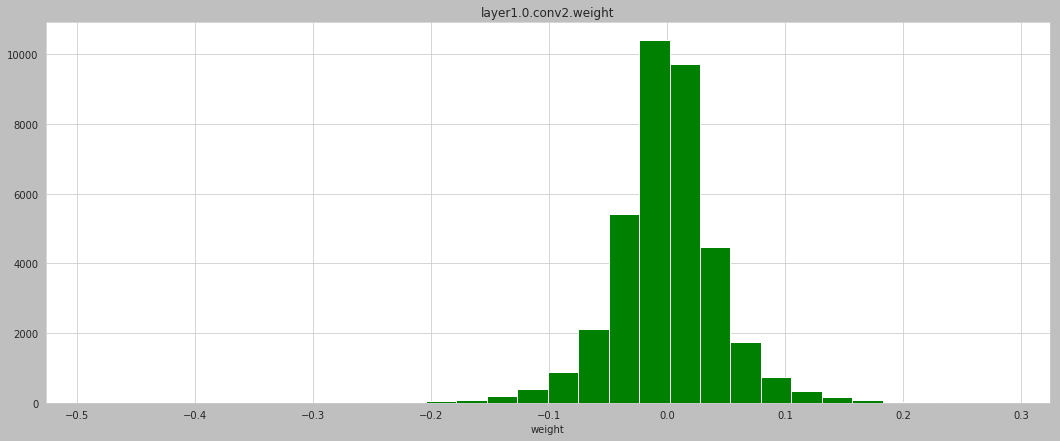

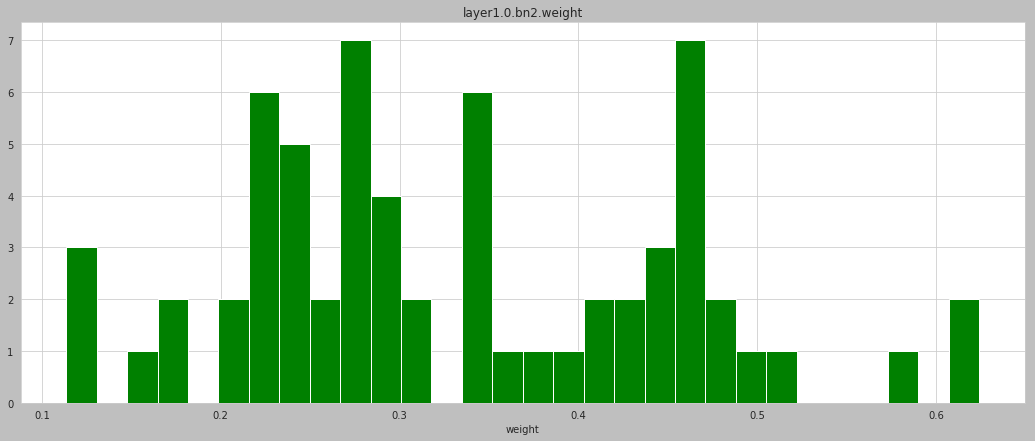

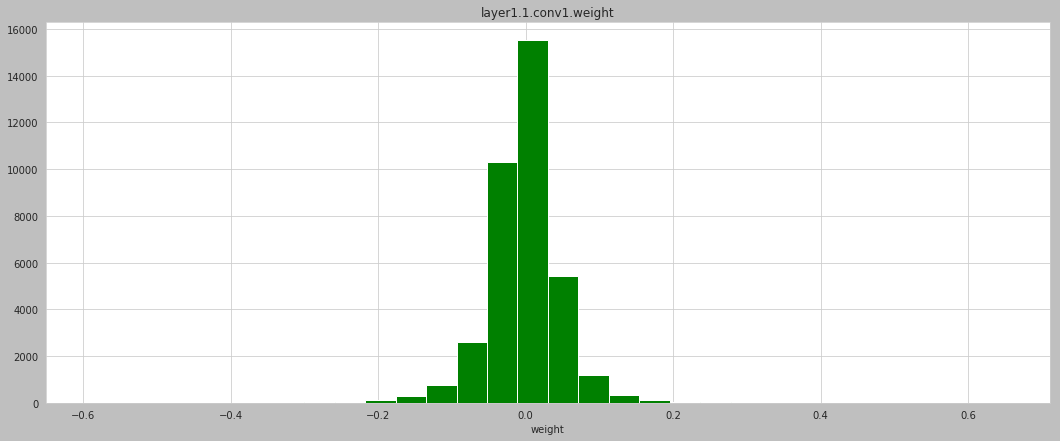

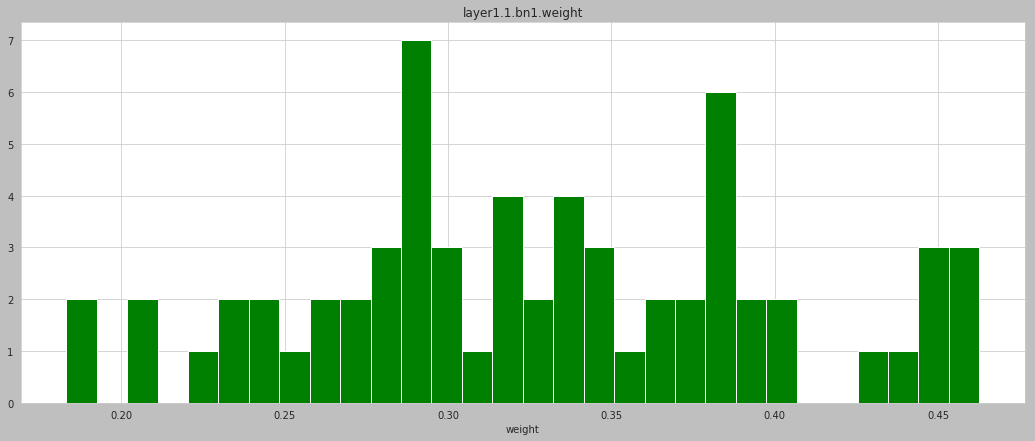

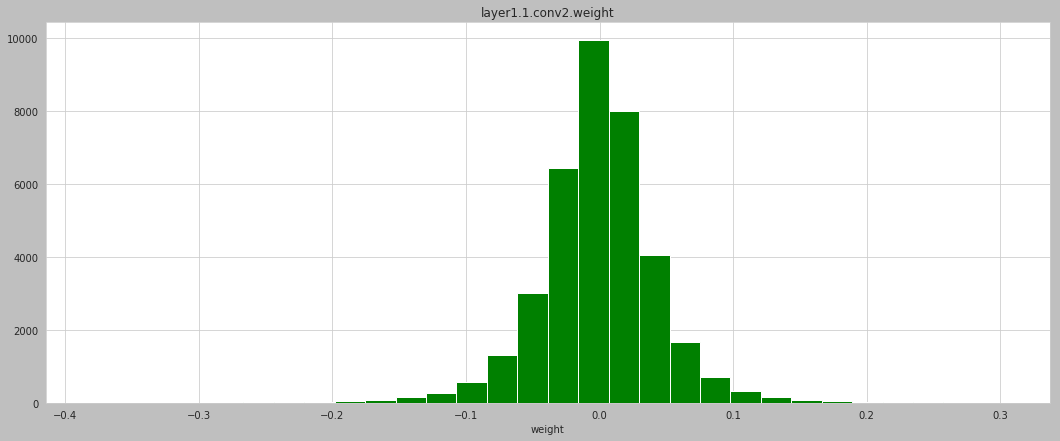

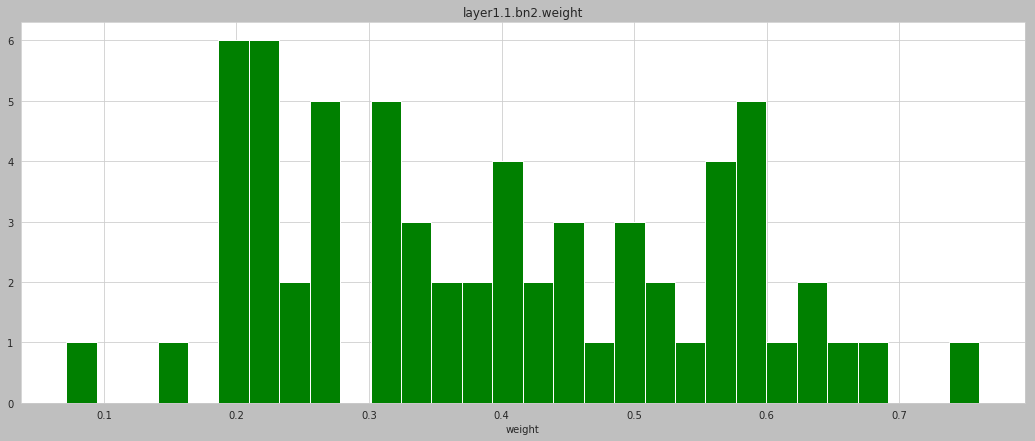

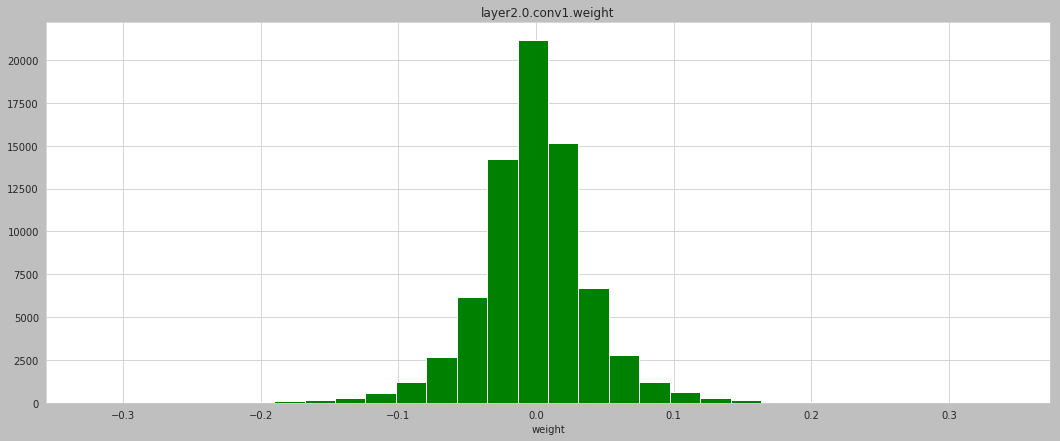

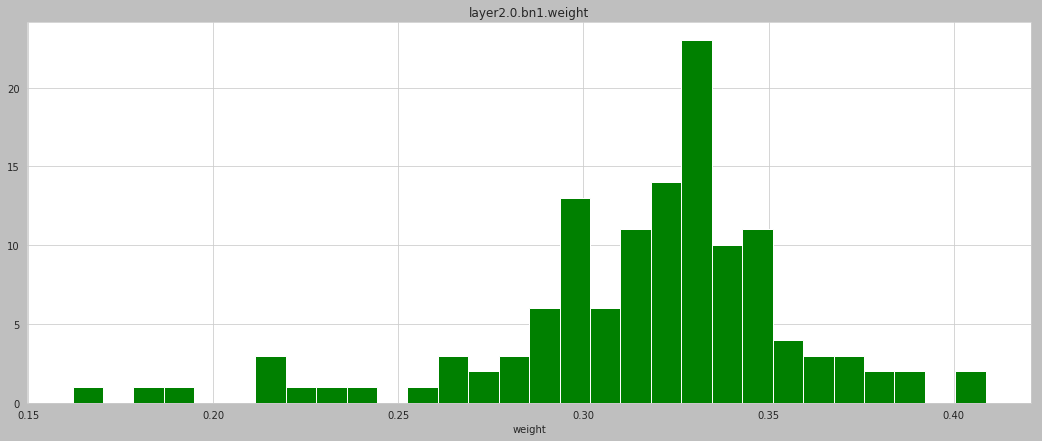

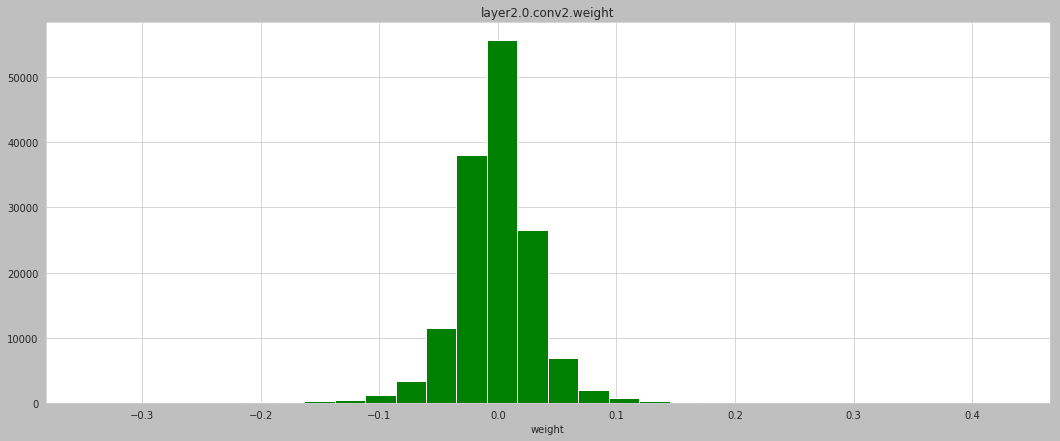

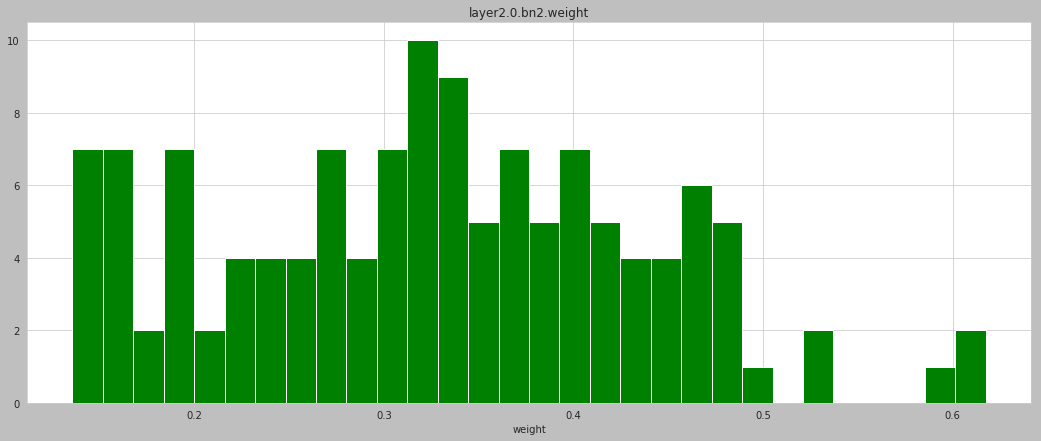

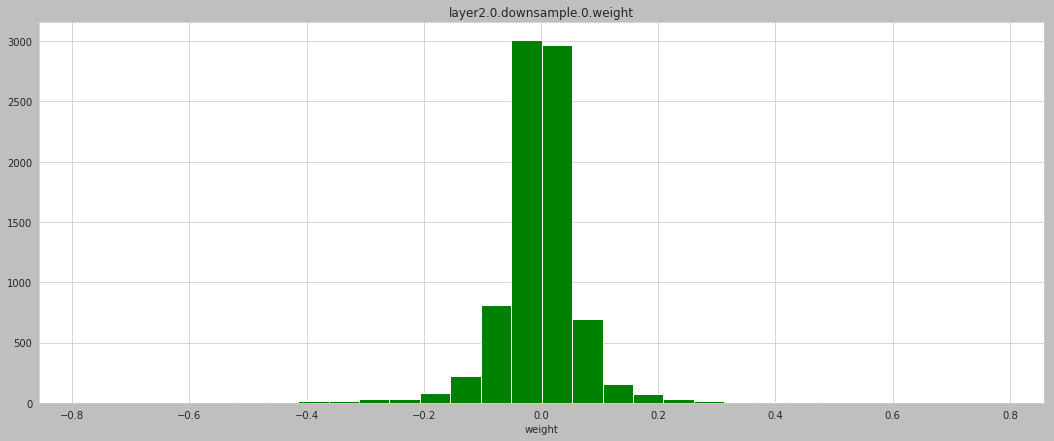

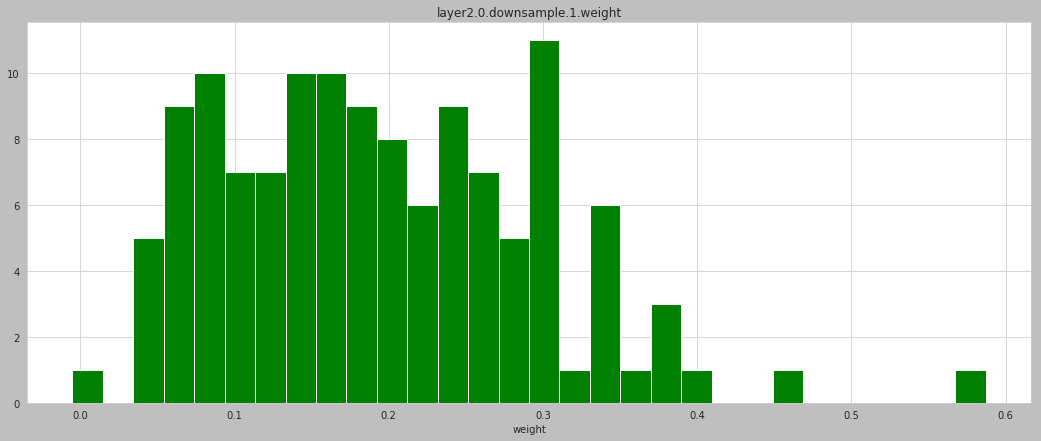

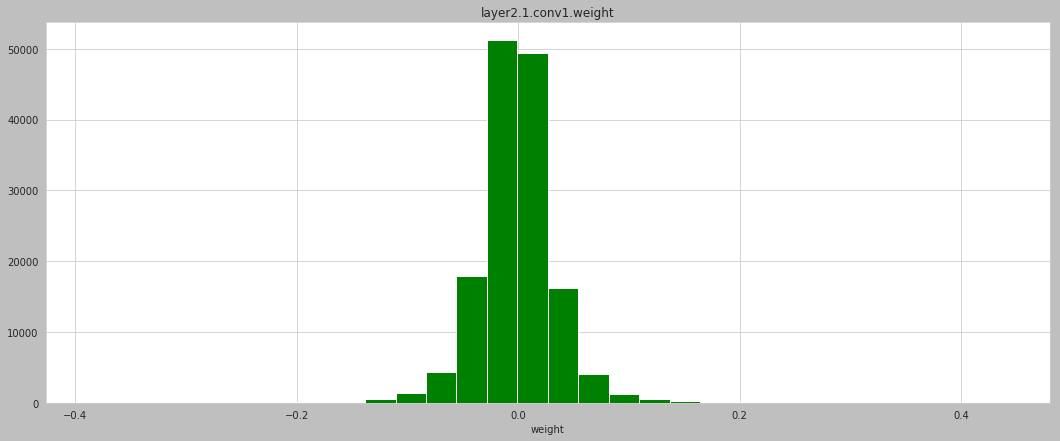

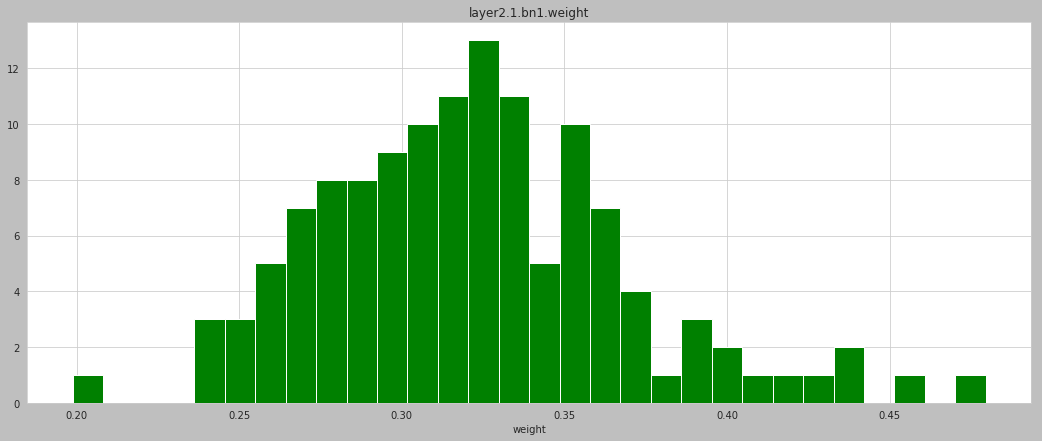

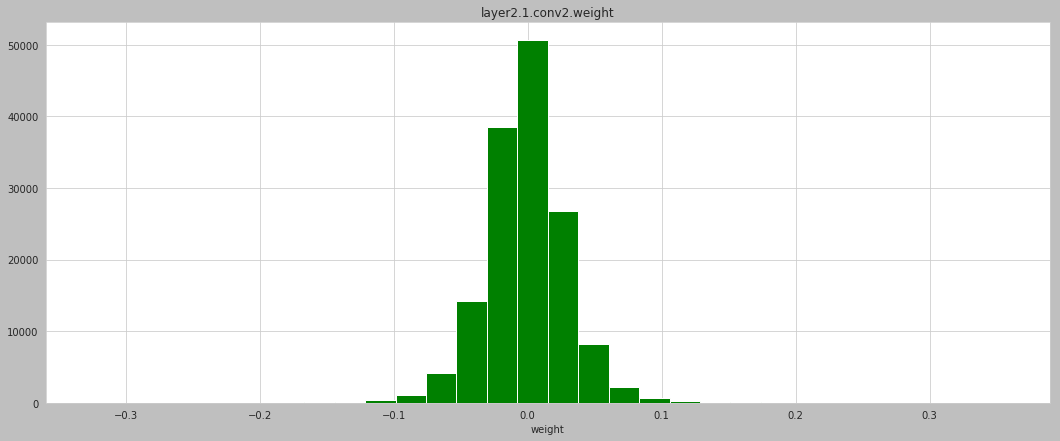

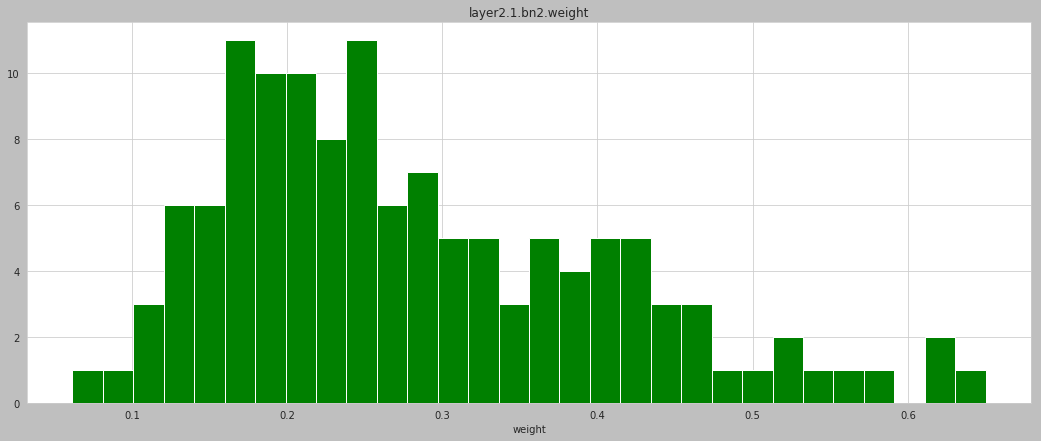

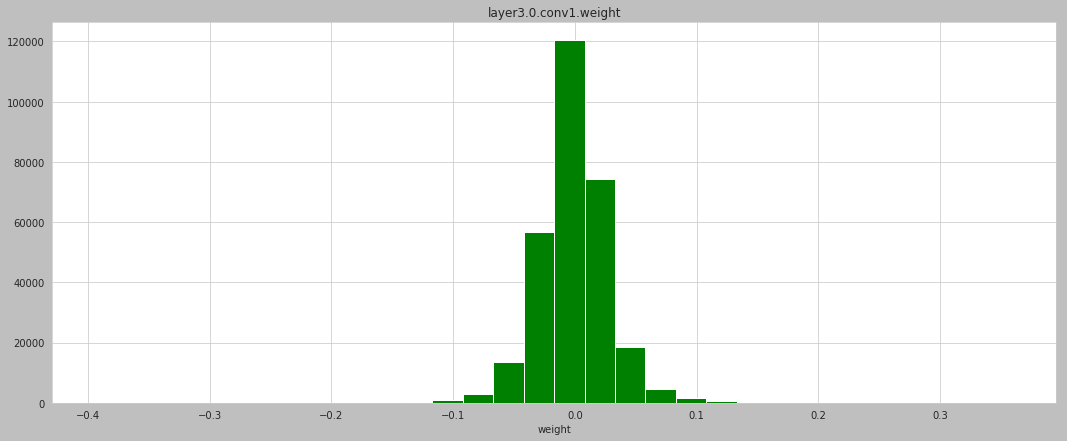

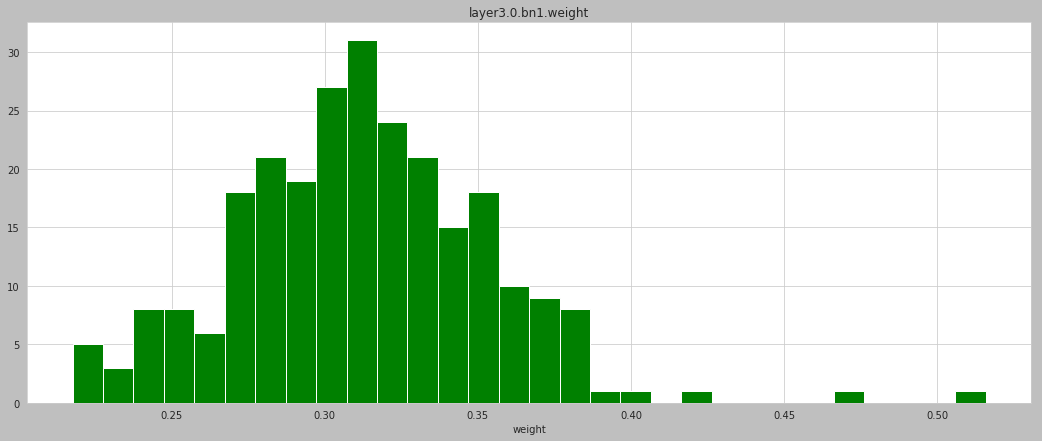

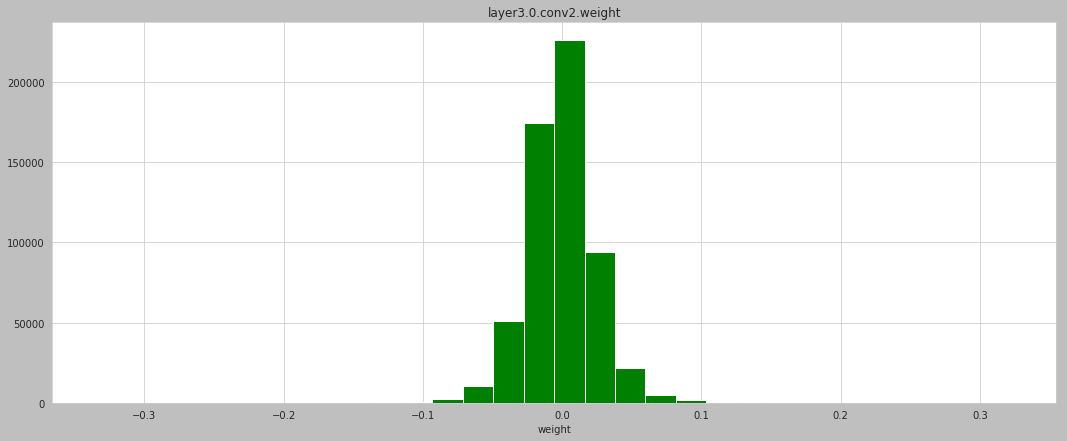

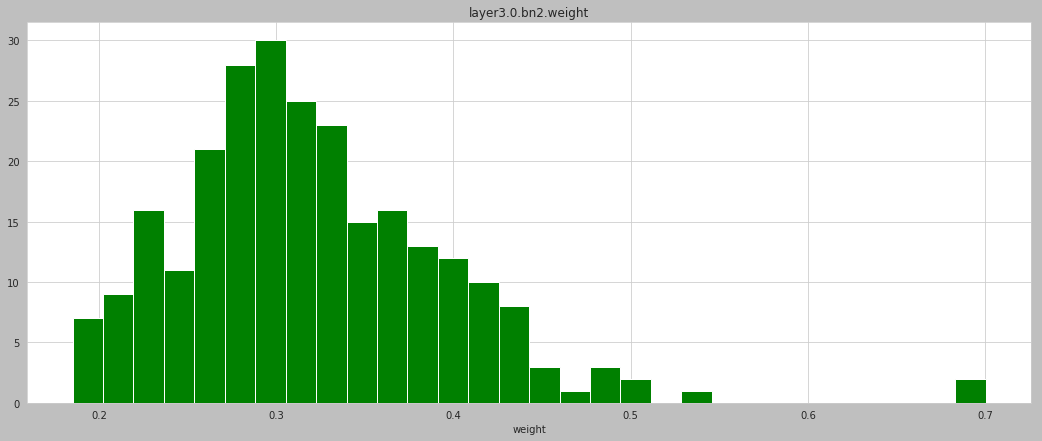

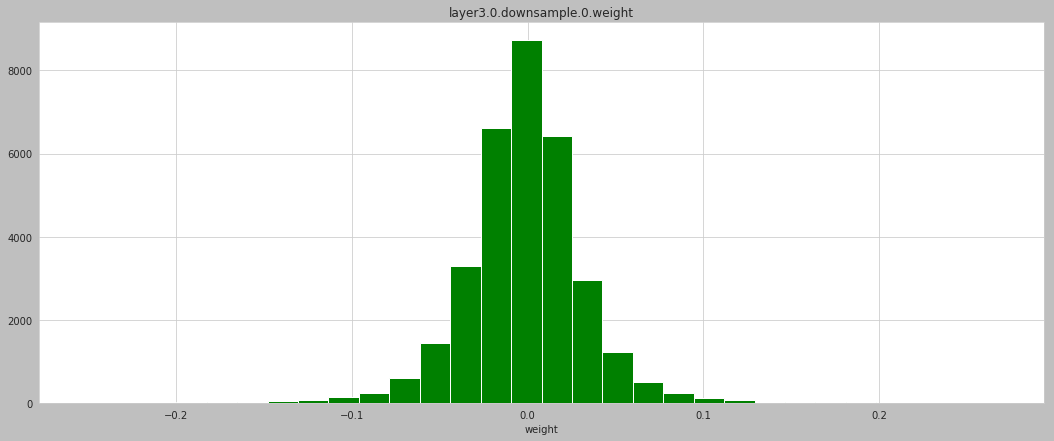

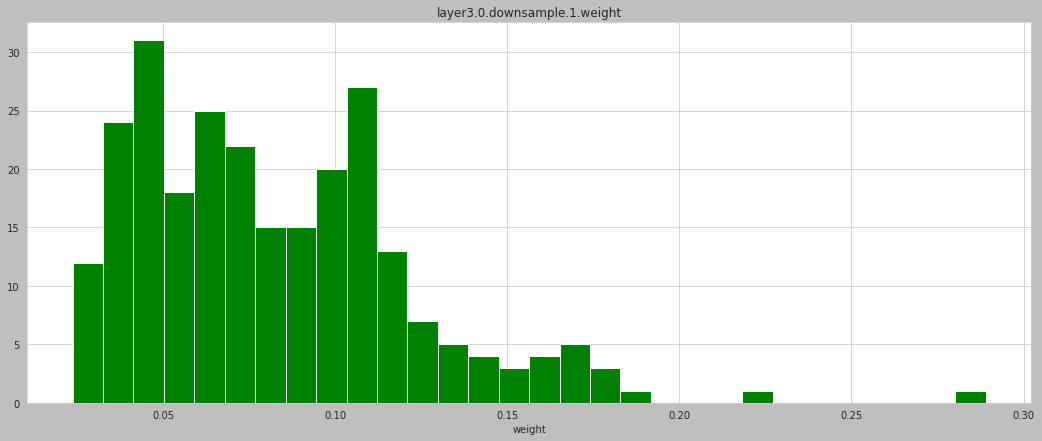

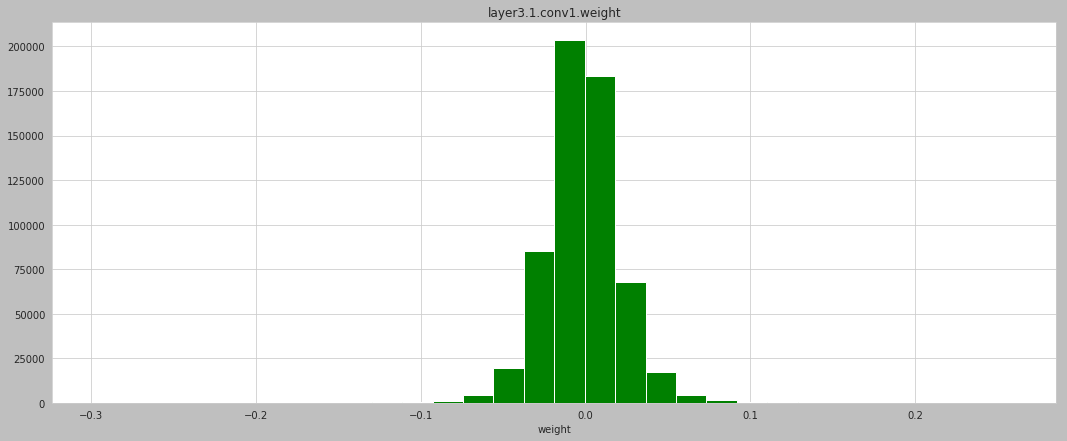

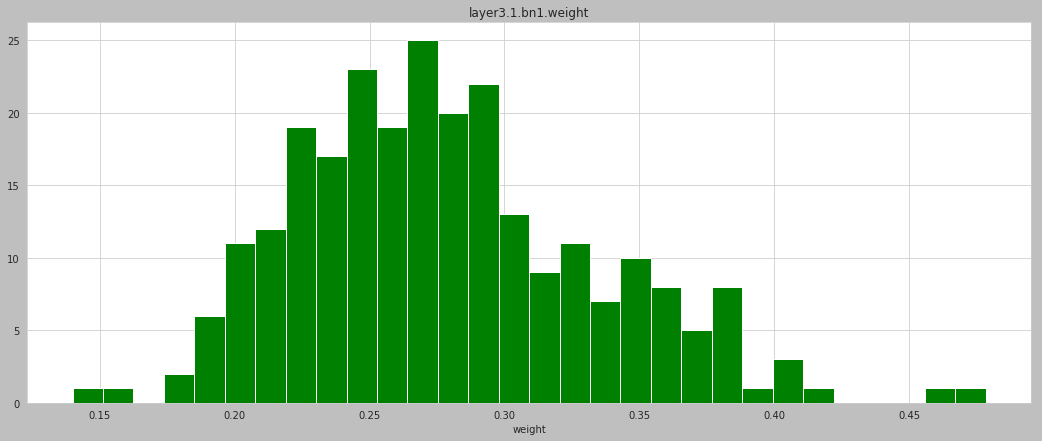

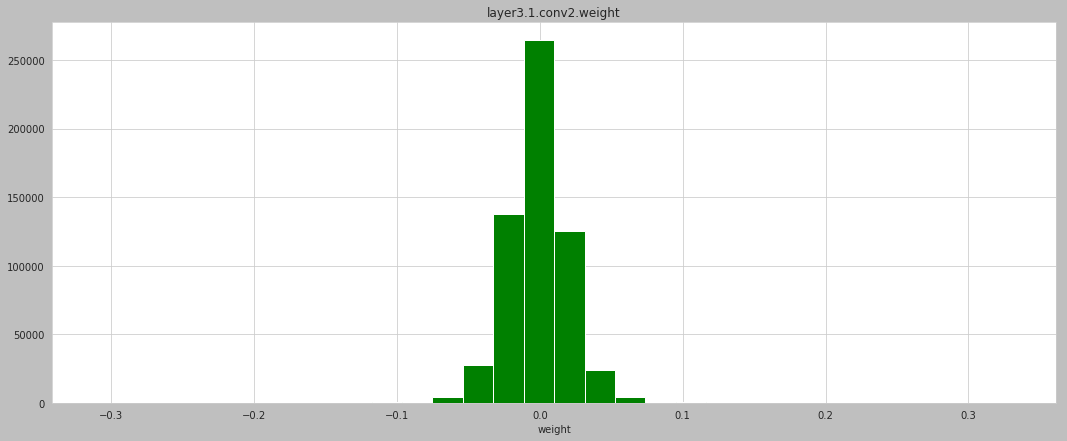

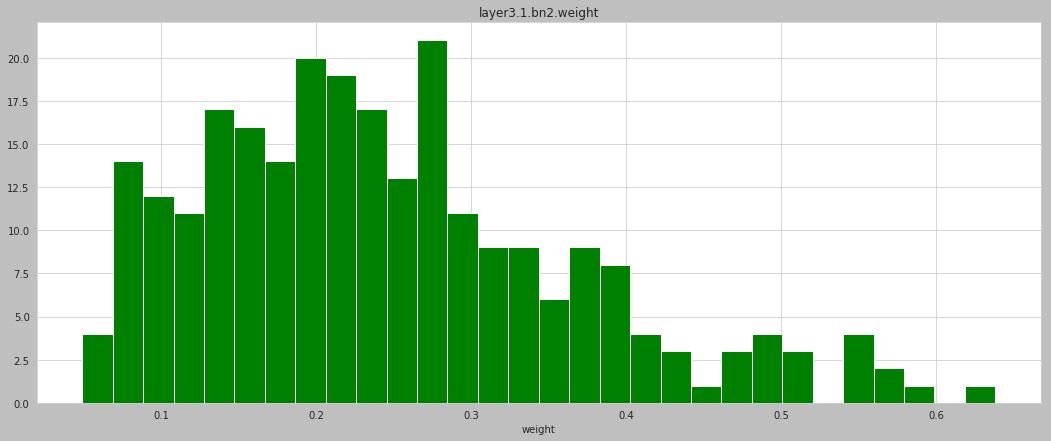

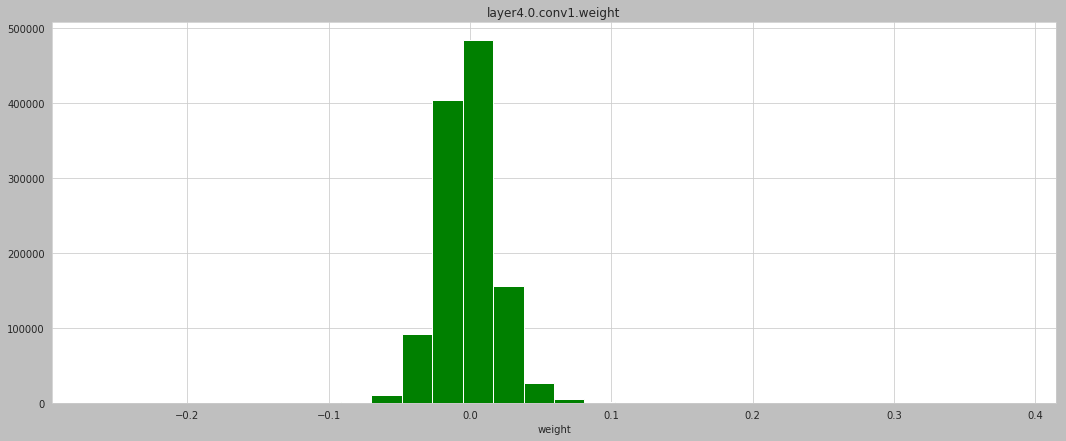

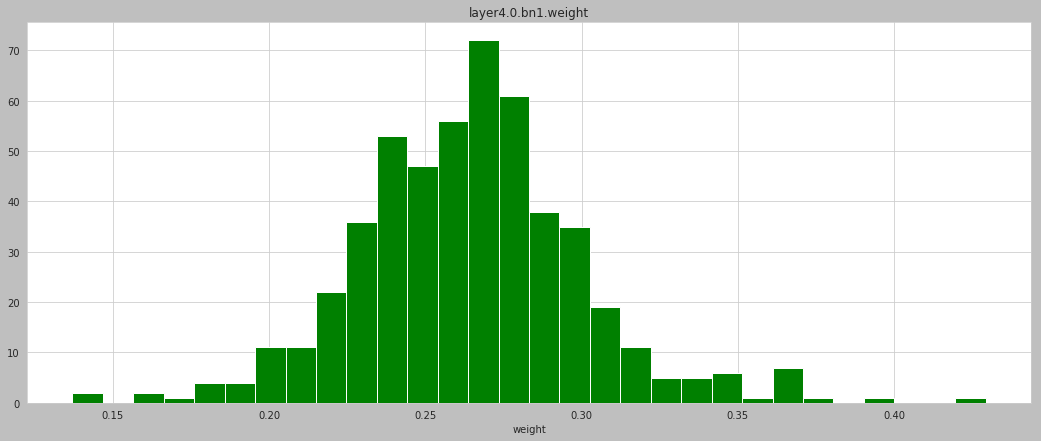

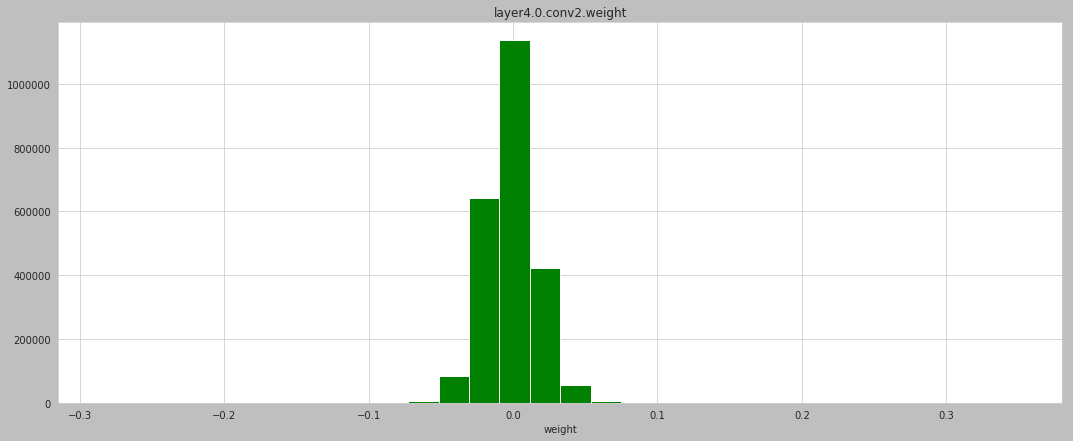

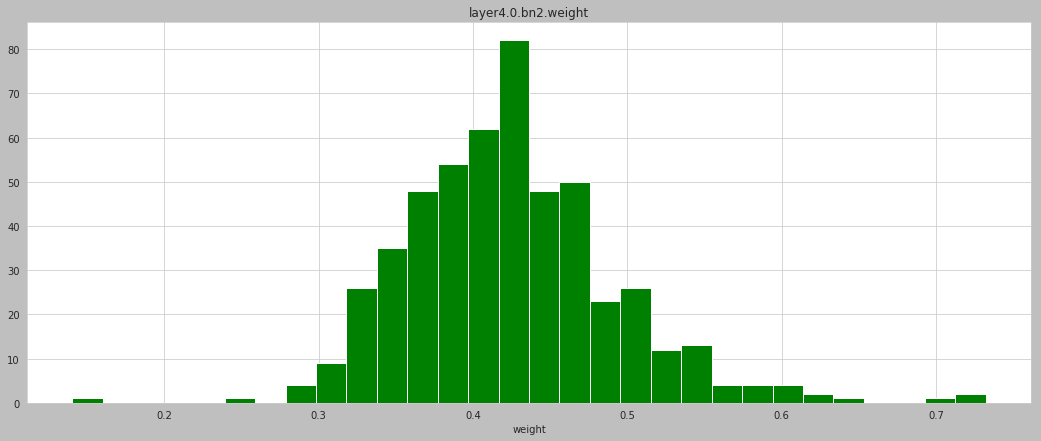

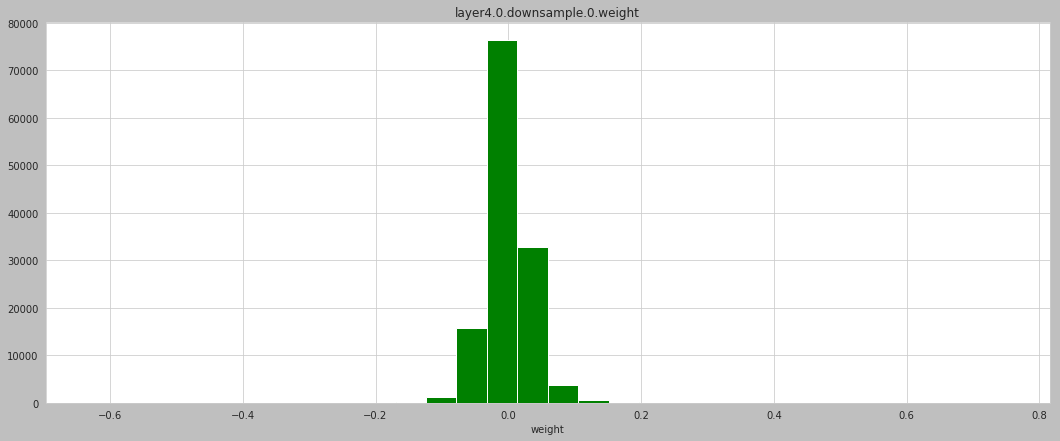

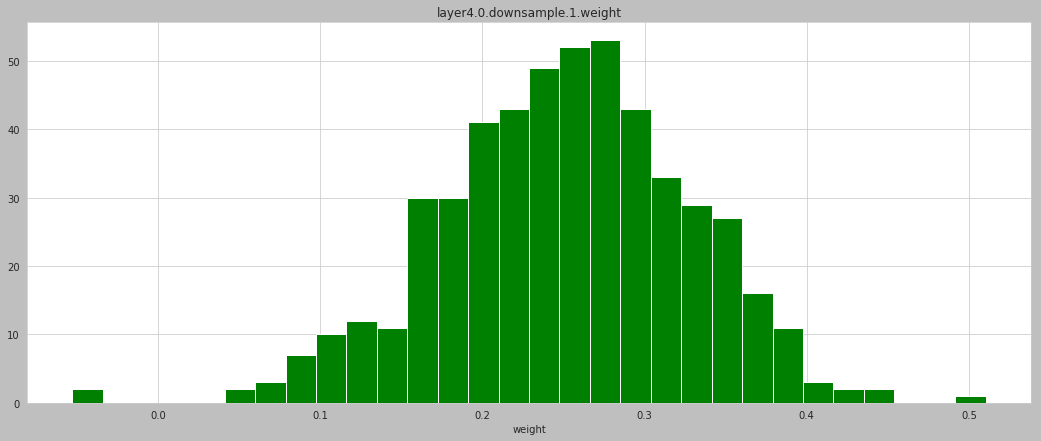

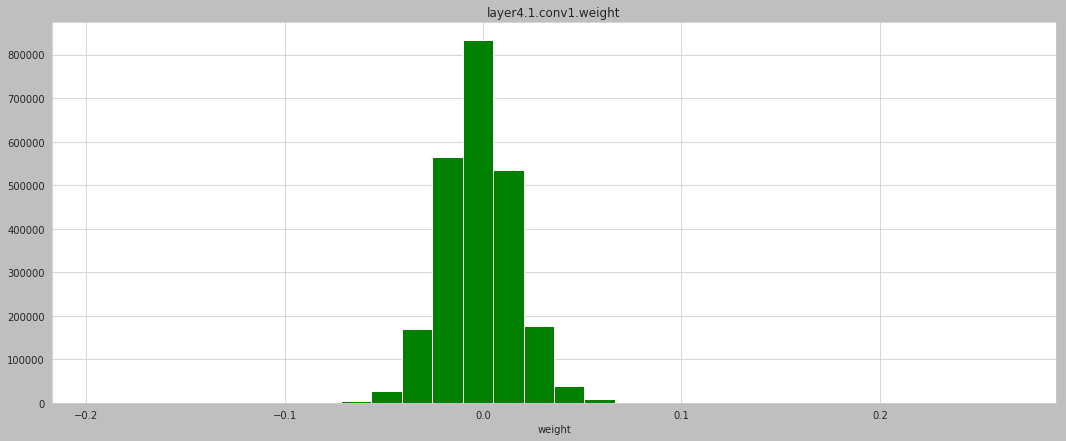

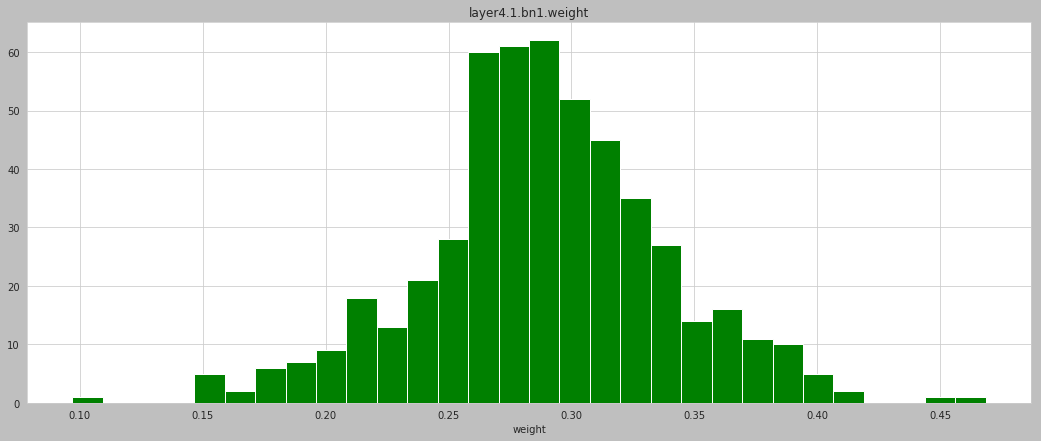

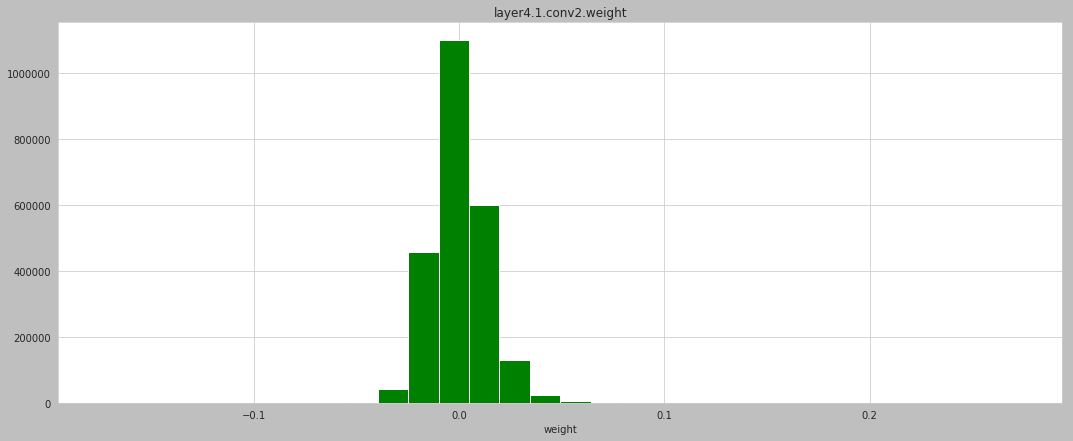

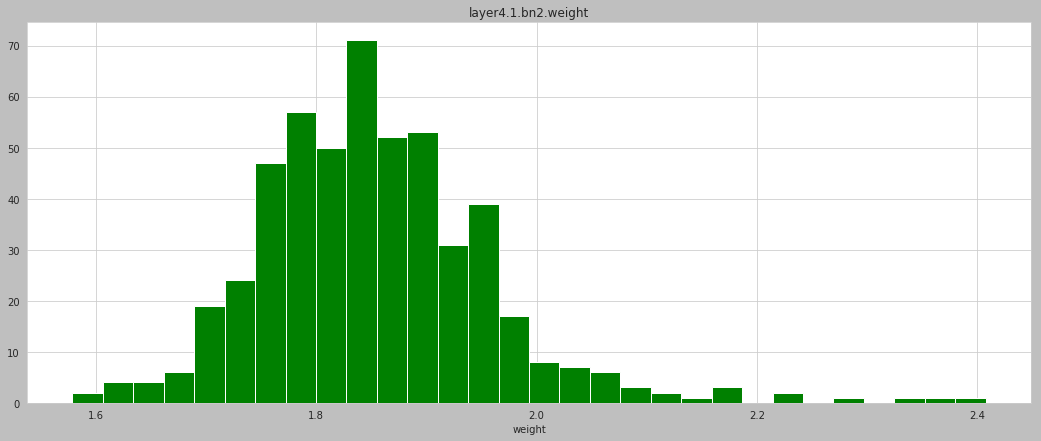

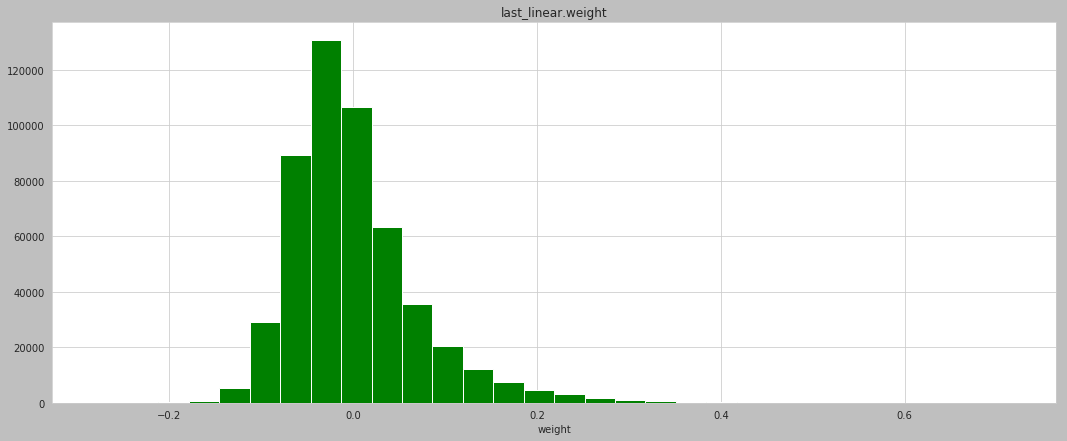

In [18]:
explainer.distributions_visualisation()

## Visualizes patches with maximum activation.
- layer - which activation layer we draw
- directory_name - folder with images
- the result will be a picture in the `./data/` folder

In [19]:
res_layers = [f'layer{i}' for i in range(1, 5)]
len(res_layers)

4

In [20]:
vgg_layers = [f'vgg.features.{i}' for i in [0, 3, 6, 8, 11, 13, 16, 18]]
len(vgg_layers)

8

Using CPU
Using 9 images
0.0%, running ./image_set/4.jpg
Number of neurons = 64
Feature map is 56 x 56
11.1%, running ./image_set/3.jpg
22.2%, running ./image_set/2.jpg
33.3%, running ./image_set/5.jpg
44.4%, running ./image_set/1.jpg
55.6%, running ./image_set/7.jpg
66.7%, running ./image_set/9.jpg
77.8%, running ./image_set/6.jpg
88.9%, running ./image_set/8.jpg


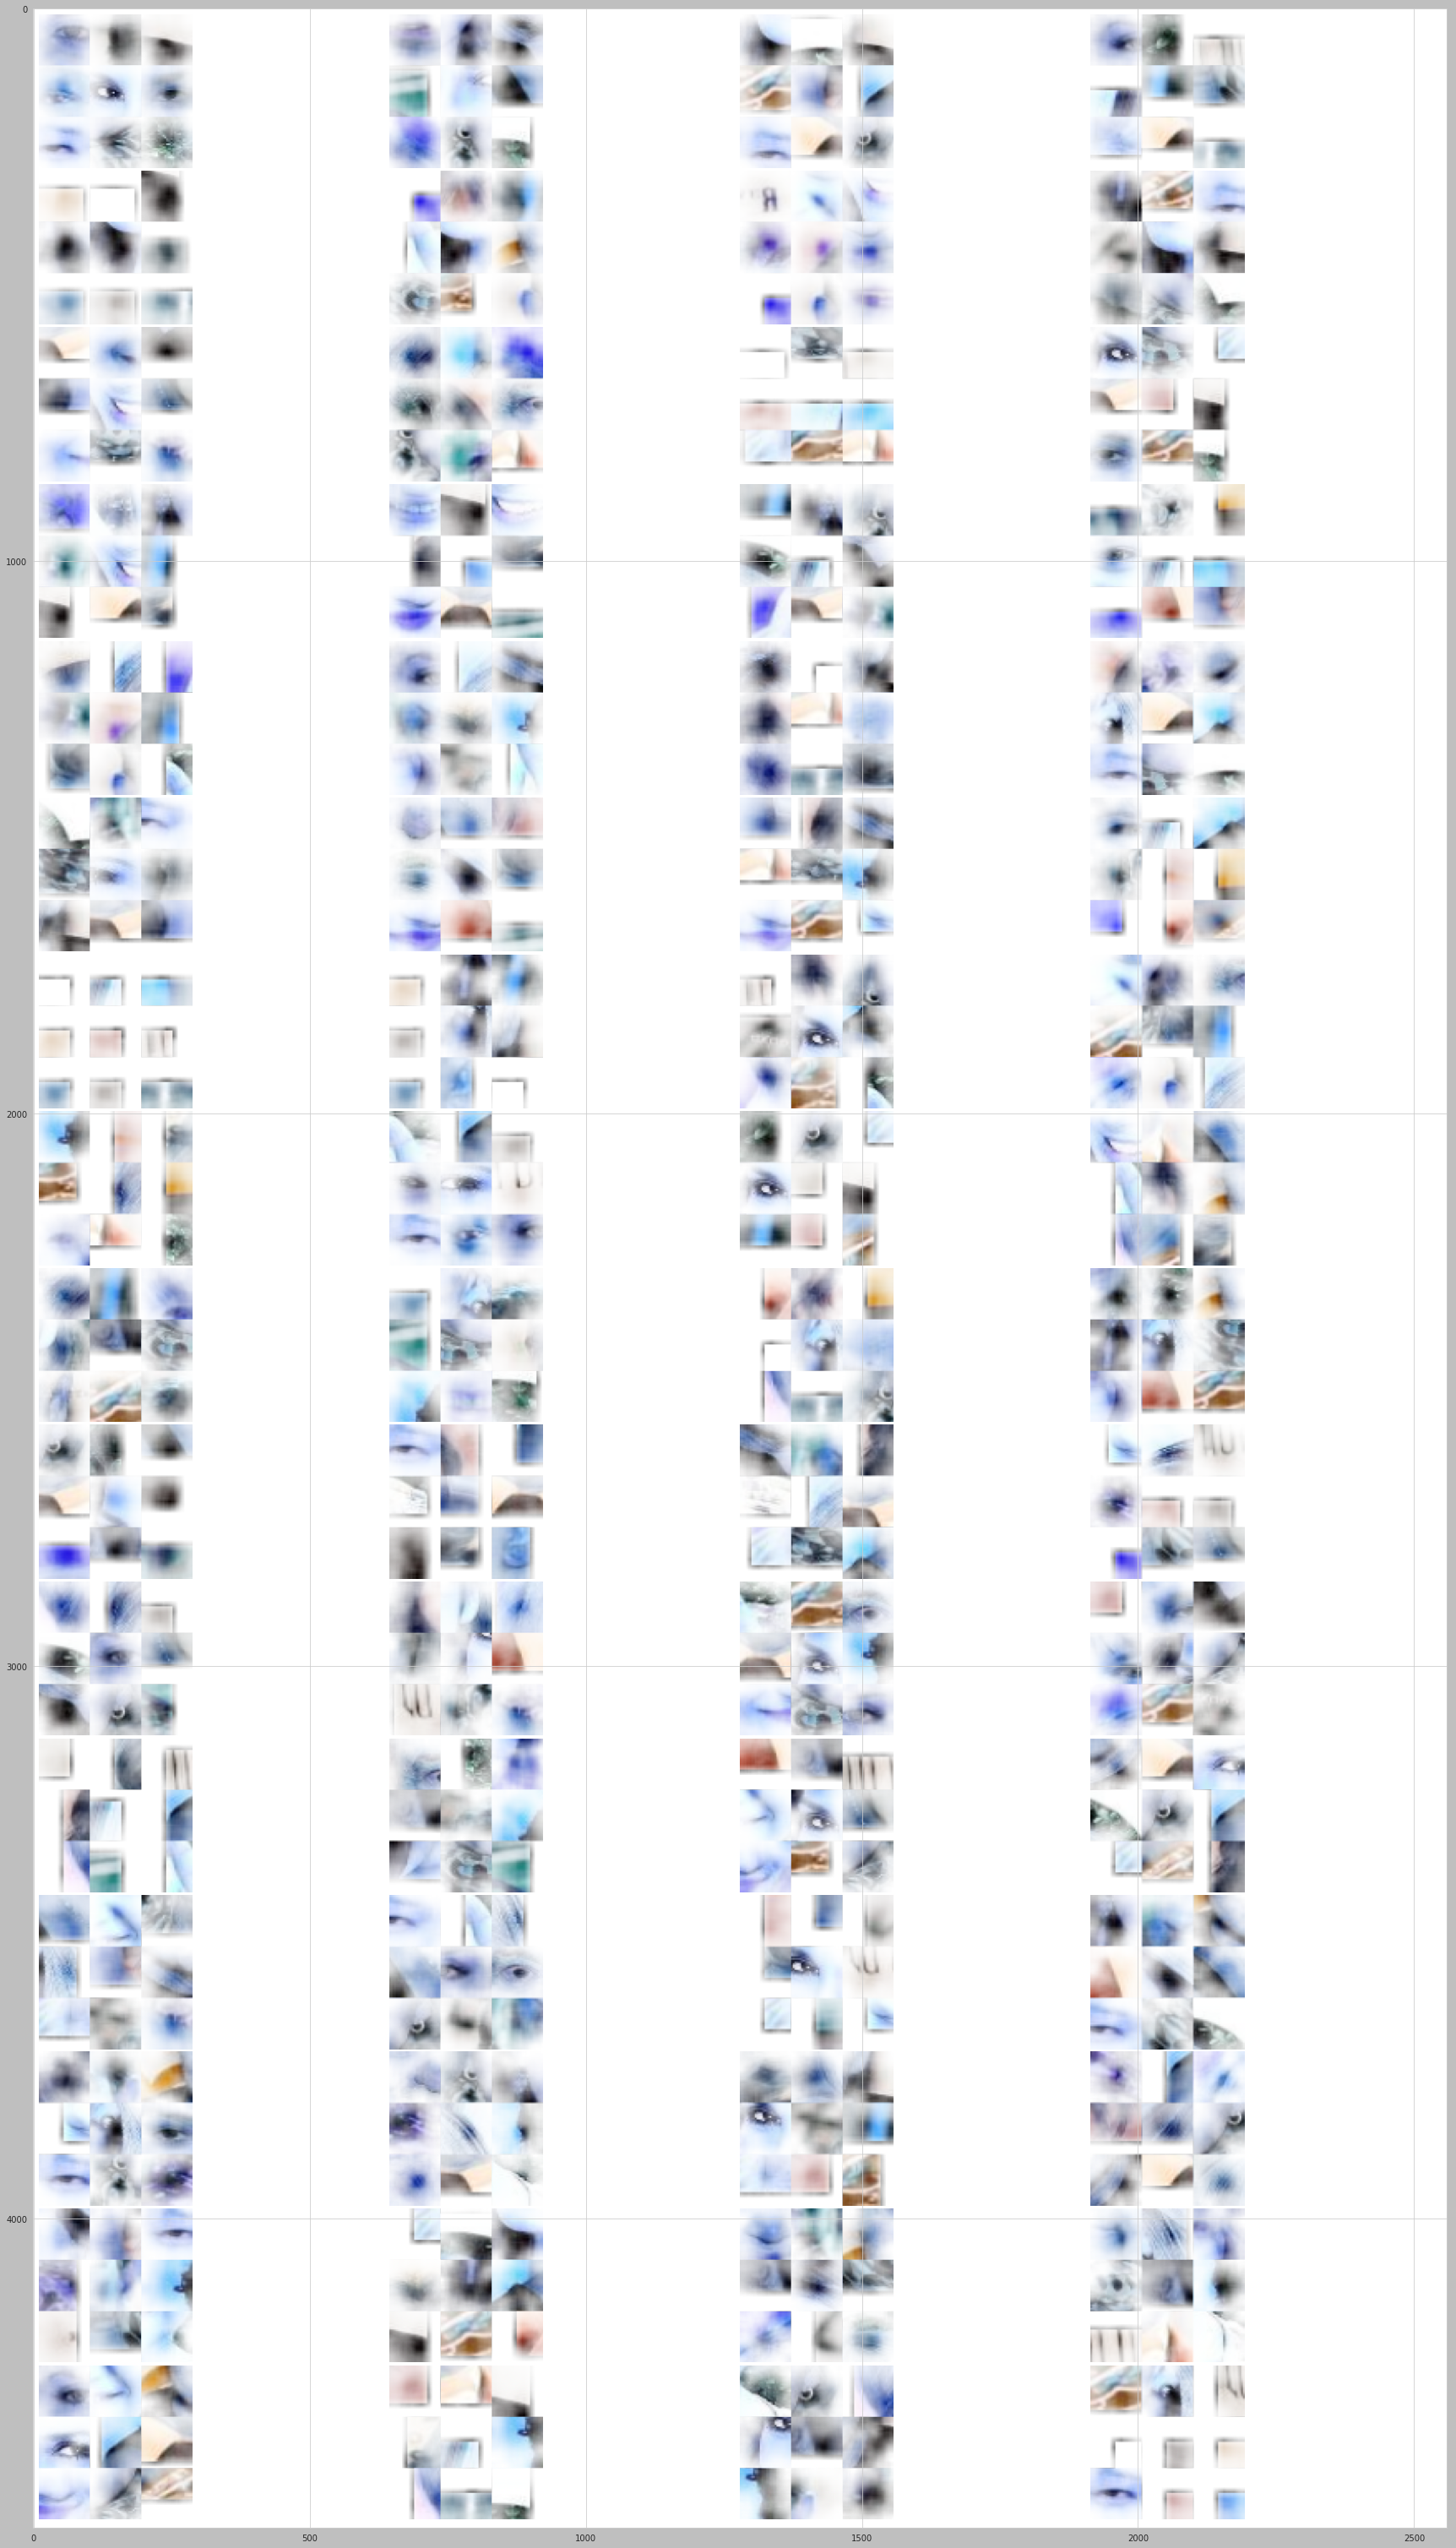

In [21]:
explainer.max_activations_patches_visualisation(layer=(vgg_layers if our_vgg else res_layers)[0], directory_name='./image_set/')